#ML Telescope Particle Classification

This ML exercise is based on the YTBE video by Kylie Ying's Machine Learning for Everybody course
https://www.youtube.com/watch?v=i_LwzRVP7bg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

Data for this example was taken from here, its licensed under creative commons by 4.0: Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [2]:
labels = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
dataSet = pd.read_csv('magic04.data', names=labels)
dataSet["class"] = (dataSet["class"] == "g").astype(int)
dataSet["fArea"] = (dataSet['fWidth']*dataSet['fLength'])
dataSet["fDist_Alpha"] = dataSet["fDist"] * dataSet["fAlpha"]
dataSet.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,fArea,fDist_Alpha
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1,460.807673,3282.845218
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1,370.504805,1305.644695
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1,22044.095612,19762.404480
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1,227.997292,1219.784913
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1,2323.248872,1656.835376


loads data into a var, remember to add labels, classifies based on class:

G = 1

H = 0

#Validation, Training, DataSets

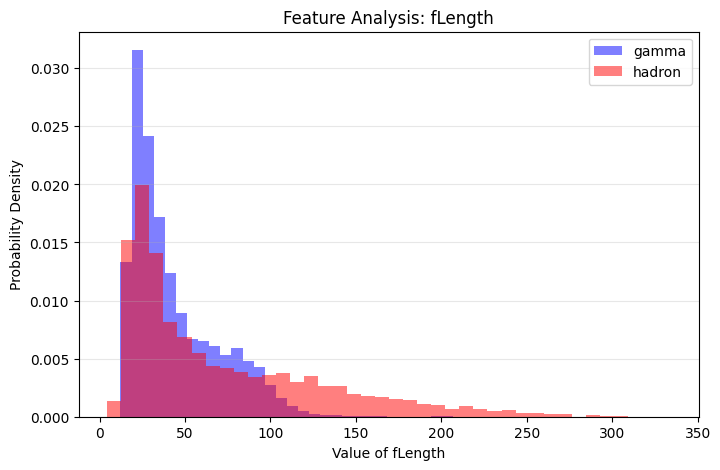

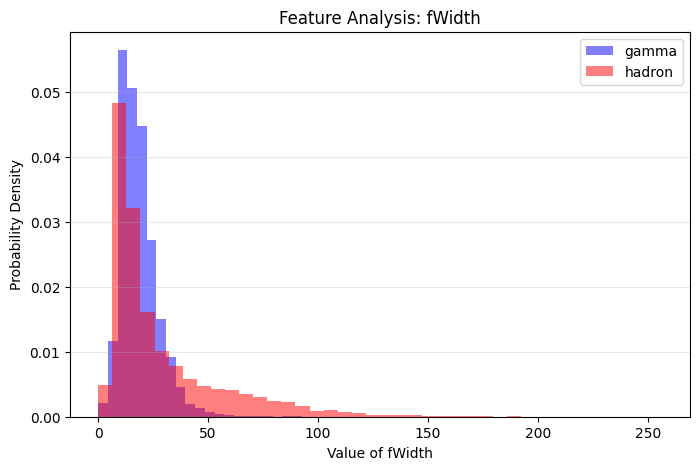

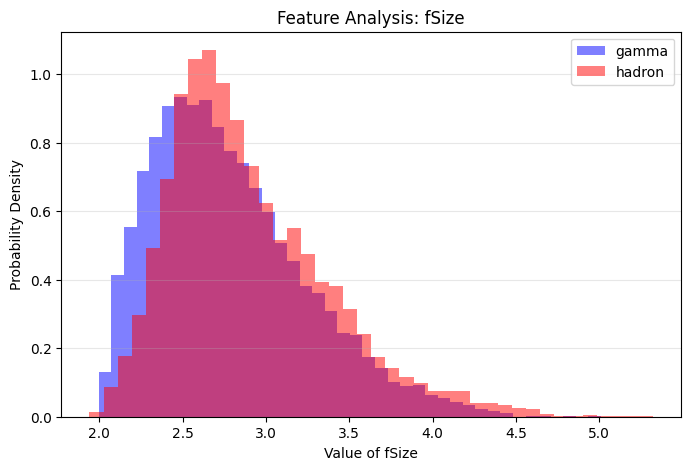

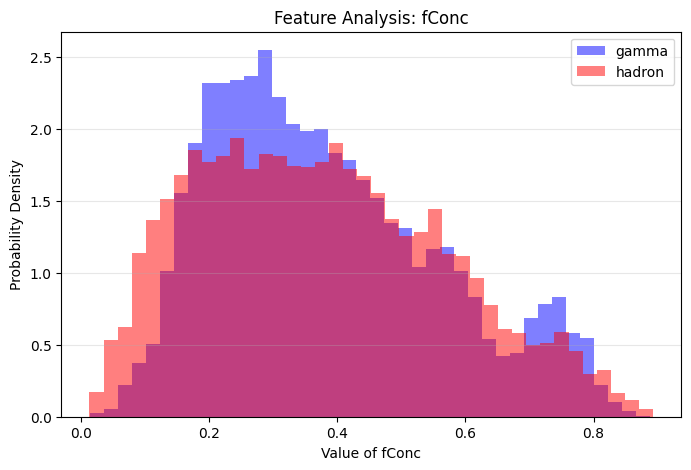

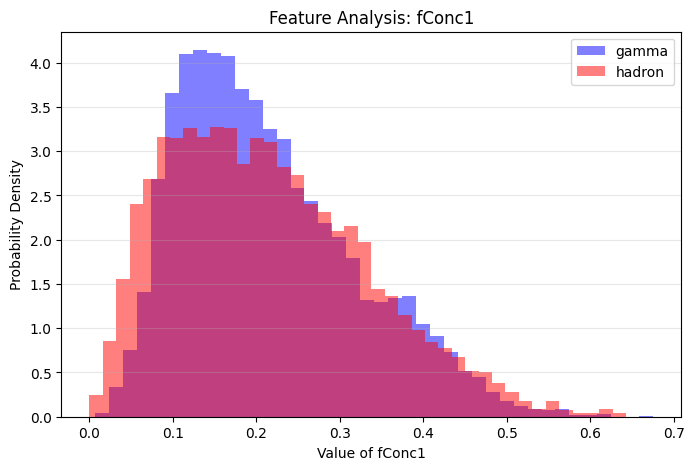

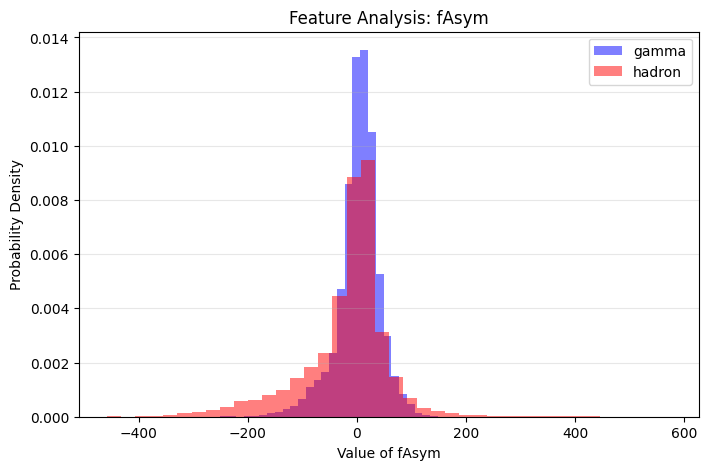

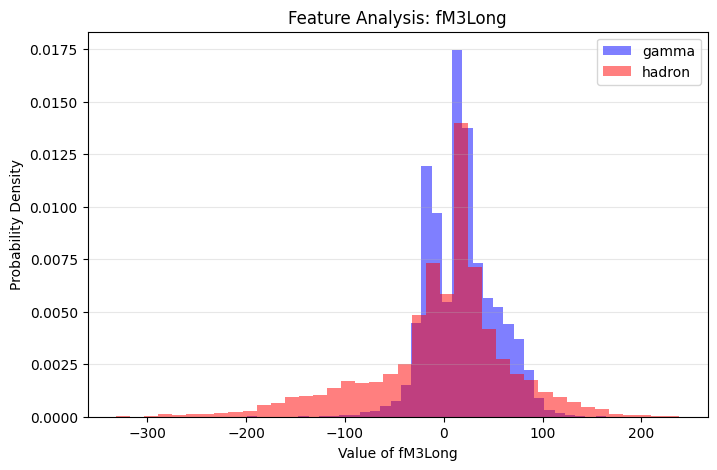

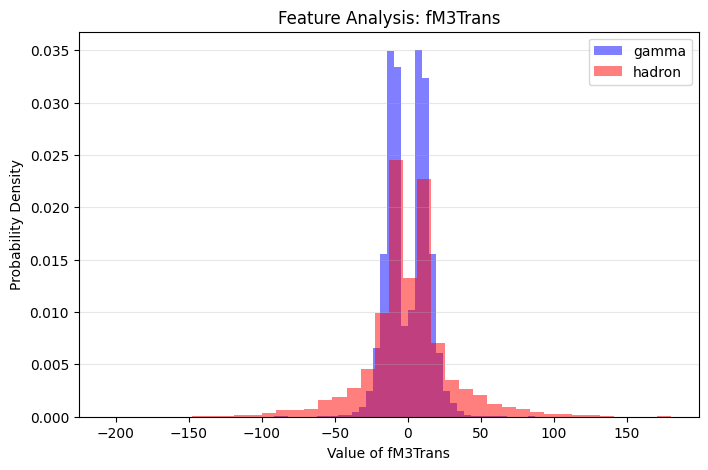

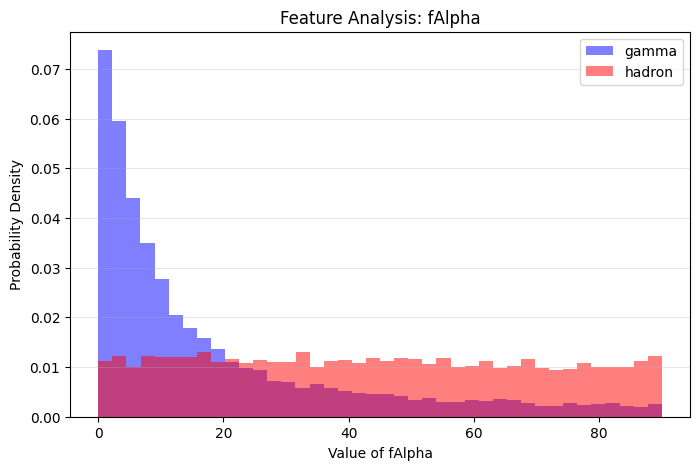

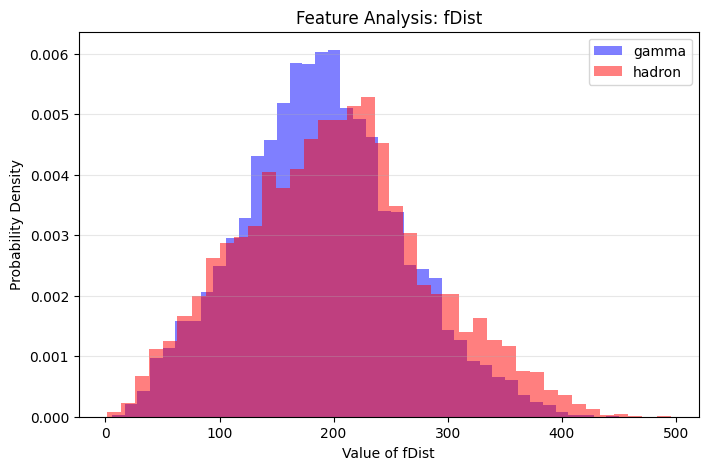

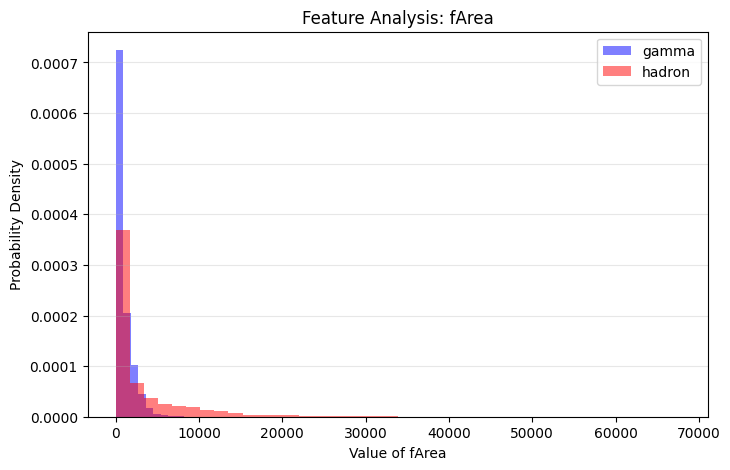

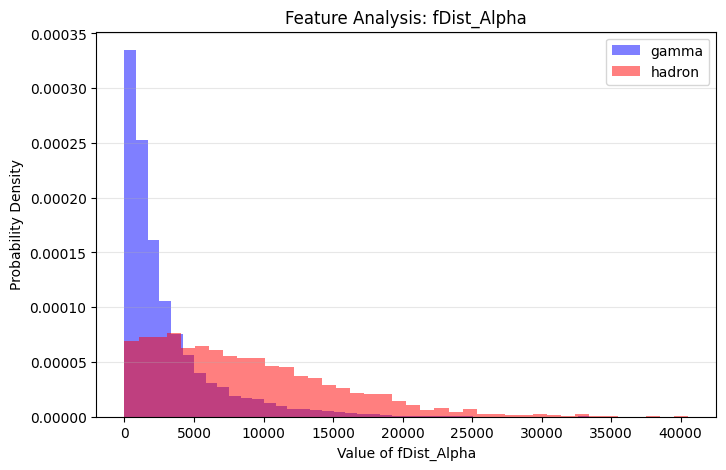

In [3]:
dataSet.replace([np.inf, -np.inf], np.nan, inplace=True)
dataSet.fillna(dataSet.median(), inplace=True) # Fill gaps with the median
features = dataSet.columns.drop('class')
for data in features:
    plt.figure(figsize=(8, 5))
    plt.hist(dataSet[dataSet['class']==1][data], color='blue', label='gamma', alpha=0.5, density=True, bins=40)
    plt.hist(dataSet[dataSet['class']==0][data], color='red', label='hadron', alpha=0.5, density=True, bins=40)

    plt.title(f"Feature Analysis: {data}")
    plt.xlabel(f"Value of {data}")
    plt.ylabel("Probability Density")
    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.show()

In [4]:
train, valid, test = np.split(dataSet.sample(frac=1),[int(0.6*len(dataSet)), int(0.8*len(dataSet))])

/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [5]:
def scaleDataSet(dataframe, oversample=False):
    x = dataframe.drop(columns=['class']).values
    y = dataframe['class'].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    data = np.hstack([x, np.reshape(y, (-1, 1))])

    return data, x, y

In [6]:
train, xTrain, yTrain = scaleDataSet(train,oversample=True)
valid, xValid, yValid = scaleDataSet(valid,oversample=False)
test, xTest, yTest = scaleDataSet(test,oversample=False)

#K Nearest Neightbors:
Essentially, lets use a X and Y graph, what it does is, lets say we want to find whether X=10 Y=10 is a Gamma or a Hadron, so what do we do?

We find the nearest N number of neighbors, closest to the point we are investigating, and do the distance equation:


SQRT((x1-x2)^2+(y1-y2)^2))

Then we figure out which value is the value of the mayority of neighbors, so if 8 out of the 10 neighbors of (10,10) are hadrons, there is a high chance (10,10) is also a hadron, this ofc can be scaled up to N number of dimensions we need to process, in this case, it would be a 10 dimensional K Nearest Neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [8]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(xTrain,yTrain)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
yPred = knnModel.predict(xTest)

In [10]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1375
           1       0.85      0.88      0.87      2429

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.83      0.82      3804



#Naive Bayes
Used to guess the posibility of X given Y, so like calculate what is the chance of an 'P' person having covid, and getting a false positive or a false negative, after taking a test, based on historic data

Essentially it just multiplies all of the individual probabilities

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nbModel = GaussianNB().fit(xTrain,yTrain)
yPred = nbModel.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.72      0.46      0.56      1375
           1       0.75      0.90      0.82      2429

    accuracy                           0.74      3804
   macro avg       0.73      0.68      0.69      3804
weighted avg       0.74      0.74      0.73      3804



#Logistic Regression
Draw a plot, put a line somewhere, that line divides the class types, that is the basis of classification, but that doesnt work for data which isnt clear cut, a 0,3 or a 0,1 would break that, so what do we do? we essentially bend the line into an S or a sigmoid, so it allows you to fine tune it with a bunch of parameters to get better results

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logModel = LogisticRegression().fit(xTrain,yTrain)
yPred = logModel.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1375
           1       0.84      0.86      0.85      2429

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.80      0.81      0.81      3804



#Support Vector Machine
Find a line somewhere in a graph, that best separates data, its what you usually do when you are explaining what a classification ML does, if it takes more axis now we have plane.
How close the line is to the closest data matters here, you want it on the dead center of the 2 groups

Not as good as dealing with outliers or weird data, even if they are the only outliers

It works with single dimension data tho, which is poggers

SVC = Support Vector Classifier

In [15]:
from sklearn.svm import SVC

In [16]:
svcModel = SVC().fit(xTrain,yTrain);
yPred = svcModel.predict(xTest);
print(classification_report(yTest,yPred));

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1375
           1       0.88      0.91      0.90      2429

    accuracy                           0.86      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#NEURALS NETS
The cool ones, one input layers, N number of hidden layer neurons, and the output

You give inputs, the inputs are modified by the neuron,for as many neurons there are, and all the neurons are added on every neuron, then gets biased before getting output

It uses an activation function to get an altered state of the value, instead of a linear sum of all the inputs + neuron value.

Works by generation, you can train this one by giving it the Loss Value, the goal is to reduce it as much as you can.

You run it, you get the old values, and sum it by an alpha, or a learning rate/how quickly you take steps, and that gives the new values to modify on the neurons


In [17]:
import tensorflow as tf
import optuna
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"Success! Found GPU: {gpu_devices[0]}")
    # This prevents TensorFlow from hogging all 4GB of VRAM immediately
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print("GPU not found. System is defaulting to CPU.")

2026-02-04 17:03:35.245332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Caskroom/mi

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/Caskroom/miniforge/base/envs/telescop

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/Caskroom/miniforge/base/envs/telescop

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/Caskroom/miniforge/base/envs/telescope_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/usr/local/Caskroom/miniforge/base/envs/telescop

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
def trainModel(xTrain,yTrain,numNodes,dropoutProb,lr,batchSize,epochs):
  early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
  )
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001
  )
  neuralNetModel = tf.keras.Sequential([
      tf.keras.Input(shape=(xTrain.shape[1],)),

      tf.keras.layers.Dense(numNodes,activation='relu'),
      tf.keras.layers.Dropout(dropoutProb),


      tf.keras.layers.Dense(numNodes,activation='relu'),
      tf.keras.layers.Dropout(dropoutProb),

      tf.keras.layers.Dense(1,activation='sigmoid')
    ])
  neuralNetModel.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = neuralNetModel.fit(xTrain,yTrain,epochs=epochs, batch_size=batchSize,validation_split=0.2,verbose=2,callbacks=[early_stop,reduce_lr])
  return neuralNetModel, history

In [ ]:
def evaluate_best_params(trial):
  num_nodes = trial.suggest_int('num_nodes', 64, 512, step=32)
  dropout_prob = trial.suggest_float('dropout_prob', 0.1, 0.5)
  lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
  batch_size = trial.suggest_categorical('batch_size', [32,64, 128])
  epochs = 100

  use_dist_alpha = trial.suggest_categorical('use_dist_alpha',[True,False])
  use_area = trial.suggest_categorical('use_area', [True, False])
  
  keep_idx = list(range(xTrain.shape[1]))
  
    # We remove from the end so indices don't shift during removal
    
  if not use_dist_alpha:
    keep_idx.remove(11)
  if not use_area:
    keep_idx.remove(10) 

    # Use the indices to slice the NumPy arrays
  xt = xTrain[:, keep_idx]
  xv = xValid[:, keep_idx]



  model, history = trainModel(xt, yTrain, num_nodes, dropout_prob, lr, batch_size, epochs)
  val_loss, val_acc = model.evaluate(xv, yValid, verbose=0)

  tf.keras.backend.clear_session()

  return val_loss

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(evaluate_best_params,n_trials=30,n_jobs=3)


In [ ]:
print(f"Best parameters: {study.best_params}")
print(f"Best val_loss: {study.best_value}")
plotParallelCords = optuna.visualization.plot_parallel_coordinate(study)
plotParallelCords.show()

In [ ]:
optimizationHistory = optuna.visualization.plot_optimization_history(study)
optimizationHistory.show()

In [ ]:
paramImportances = optuna.visualization.plot_param_importances(study)
paramImportances.show()

In [ ]:
final_model, history = trainModel(
    xTrain, yTrain,
    numNodes=study.best_params['num_nodes'],
    dropoutProb=study.best_params['dropout_prob'],
    lr=study.best_params['lr'],
    batchSize=study.best_params['batch_size'],
    epochs=100
)

In [ ]:
y_pred = (final_model.predict(xValid) > 0.6).astype(int)
print(classification_report(yValid, y_pred))